In [1]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, AveragePooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, sigmoid, softmax

from tensorflow.keras import Input, Model

from tensorflow.keras.constraints import max_norm 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K

from tensorflow.keras.datasets import cifar10

import sys
import numpy as np
from termcolor import colored

import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib notebook

In [2]:
# set metaparameters
batch_size = 32
num_classes = 10
epochs = 10

# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# conversion and preprocessing
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train /= 255
x_test /= 255

In [4]:
# custom interface functions
def ref_conv2d(X, w, b, kernel_size, strides, padding, groups):
    return Conv2D(input_shape=X.shape, weights=[w, b], kernel_size=kernel_size, filters=w.shape[3], strides=strides, padding=padding, groups=groups)(X).numpy()

def ref_dense(X, w, b):
    return Dense(w.shape[1], input_shape=X.shape, weights=[w, b])(X).numpy()

def ref_relu(X):
    return relu(X).numpy()

def ref_sigmoid(X):
    return sigmoid(X).numpy()
    
def ref_softmax(X):
    return softmax(K.constant(X)).numpy()

def ref_maxpool2d(X, pool_size, strides, padding):
    return MaxPooling2D(pool_size=pool_size, strides=strides, padding=padding)(X).numpy()

def ref_avgpool2d(X, pool_size, strides, padding):
    return AveragePooling2D(pool_size=pool_size, strides=strides, padding=padding)(X).numpy()

In [10]:
# build model
def run_model(X, c1, c2, c3, c4, d1, d2):
    X = ref_conv2d(X, c1[0], c1[1], kernel_size=(3, 3), strides=(1, 1), padding="same", groups=1)
    X = ref_relu(X)
    X = ref_maxpool2d(X, pool_size=(2, 2), strides=(2, 2), padding="valid")

    X = ref_conv2d(X, c2[0], c2[1], kernel_size=(3, 3), strides=(1, 1), padding="same", groups=1)
    X = ref_relu(X)
    X = ref_maxpool2d(X, pool_size=(2, 2), strides=(2, 2), padding="valid")

    X = ref_conv2d(X, c3[0], c3[1], kernel_size=(3, 3), strides=(1, 1), padding="same", groups=1)
    X = ref_relu(X)
    X = ref_maxpool2d(X, pool_size=(2, 2), strides=(2, 2), padding="valid")

    X = ref_conv2d(X, c4[0], c4[1], kernel_size=(3, 3), strides=(1, 1), padding="same", groups=1)
    X = ref_relu(X)
    X = ref_maxpool2d(X, pool_size=(2, 2), strides=(2, 2), padding="valid")

    X = X.reshape(X.shape[0], np.prod(X.shape[1:]))
    X = ref_dense(X, d1[0], d1[1])
    X = ref_relu(X)
    X = ref_dense(X, d2[0], d2[1])
    return ref_softmax(X)

<IPython.core.display.Javascript object>


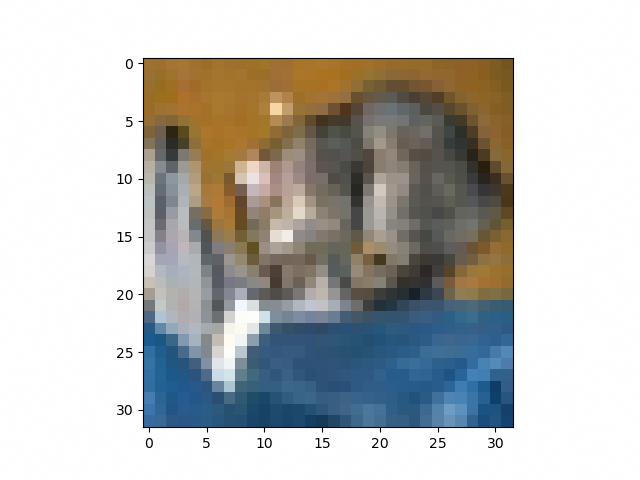

0 -- Reference: cat 	Result: dog


<IPython.core.display.Javascript object>


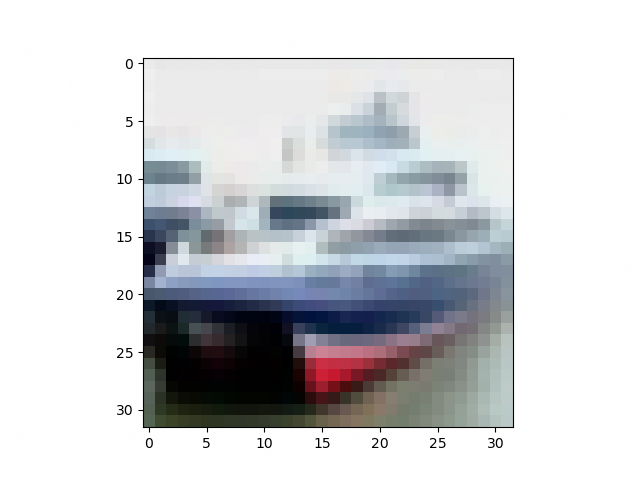

1 -- Reference: ship 	Result: ship


<IPython.core.display.Javascript object>


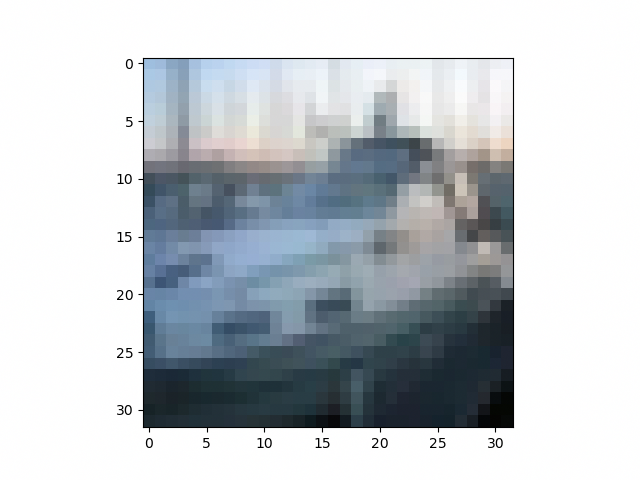

2 -- Reference: ship 	Result: ship


<IPython.core.display.Javascript object>


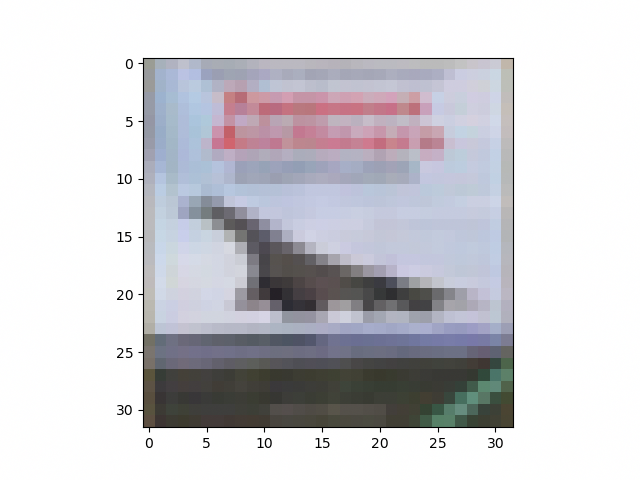

3 -- Reference: airplane 	Result: airplane


<IPython.core.display.Javascript object>


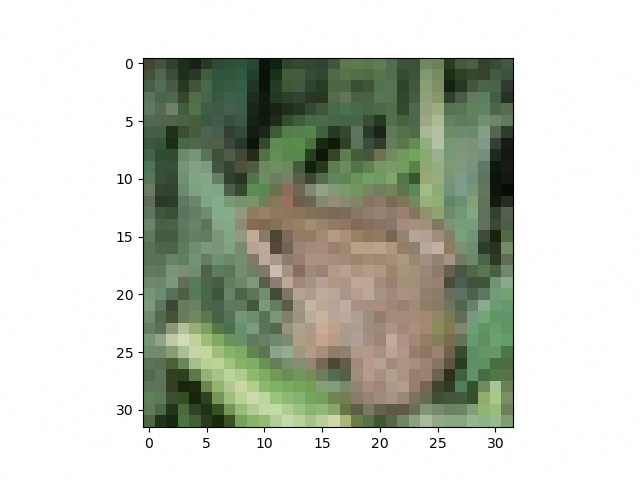

4 -- Reference: frog 	Result: frog


<IPython.core.display.Javascript object>


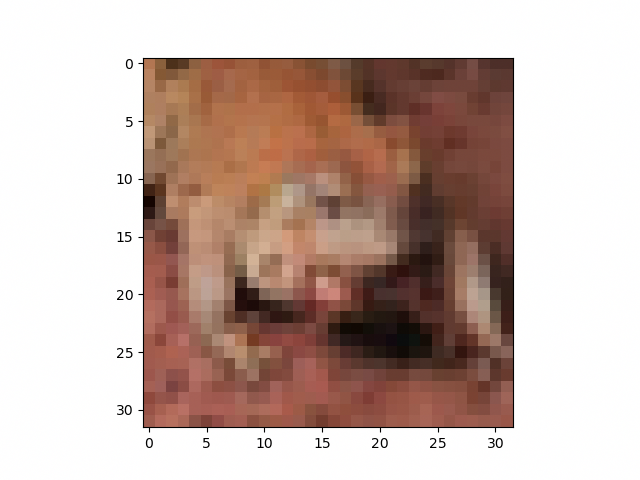

5 -- Reference: frog 	Result: frog


<IPython.core.display.Javascript object>


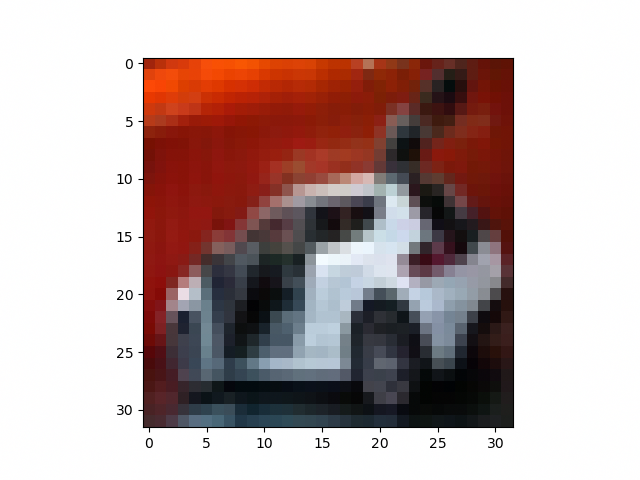

6 -- Reference: automobile 	Result: automobile


<IPython.core.display.Javascript object>


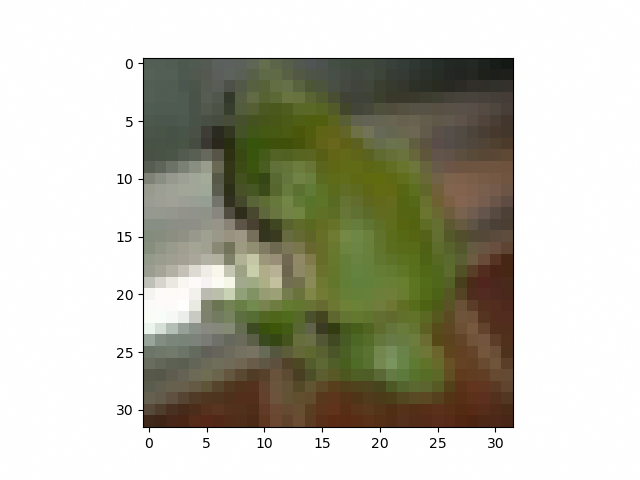

7 -- Reference: frog 	Result: frog


<IPython.core.display.Javascript object>


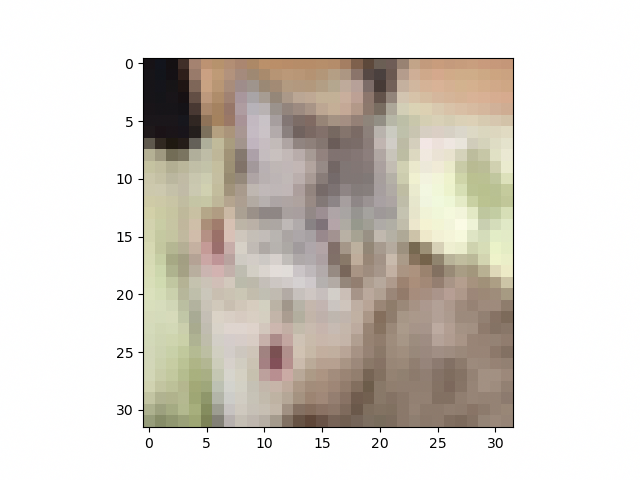

8 -- Reference: cat 	Result: cat


<IPython.core.display.Javascript object>


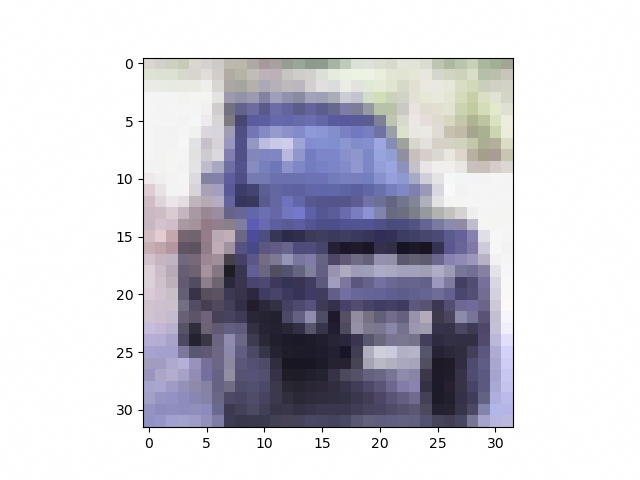

9 -- Reference: automobile 	Result: automobile


In [11]:
# execute model on test data
classes = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

c1 = [np.load("c1w.npy"), np.load("c1b.npy")]
c2 = [np.load("c2w.npy"), np.load("c2b.npy")]
c3 = [np.load("c3w.npy"), np.load("c3b.npy")]
c4 = [np.load("c4w.npy"), np.load("c4b.npy")]
d1 = [np.load("d1w.npy"), np.load("d1b.npy")]
d2 = [np.load("d2w.npy"), np.load("d2b.npy")]

for i in range(10):
    plt.figure(i)
    plt.imshow(x_test[i])
    plt.show()
    
    res = run_model(np.array([x_test[i]]), c1, c2, c3, c4, d1, d2)
    
    color = "green"
    if int(y_test[i]) != np.argmax(res):
        color = "red"
    
    print(i, "-- Reference:", classes[int(y_test[i])], colored("\tResult: " + classes[np.argmax(res)], color))